In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\song_data (1).csv")
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [3]:
data.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [4]:
data.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [5]:
data['song_popularity']=data['song_popularity'].astype(float)
data['song_duration_ms']=data['song_duration_ms'].astype(float)
data['key']=data['key'].astype(float)
data['audio_mode']=data['audio_mode'].astype(float)
data['time_signature']=data['time_signature'].astype(float)

In [6]:
data.dtypes

song_name            object
song_popularity     float64
song_duration_ms    float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
audio_mode          float64
speechiness         float64
tempo               float64
time_signature      float64
audio_valence       float64
dtype: object

In [7]:
data["popularity"]= [1 if i>=66.5 else 0 for i in data.song_popularity]
data["popularity"].value_counts()

popularity
0    13386
1     5449
Name: count, dtype: int64

In [8]:
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520,0.496,0.682,0.000029,8.0,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,1
1,In The End,66.0,216933.0,0.010300,0.542,0.853,0.000000,3.0,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,0
2,Seven Nation Army,76.0,231733.0,0.008170,0.737,0.463,0.447000,0.0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,1
3,By The Way,74.0,216933.0,0.026400,0.451,0.970,0.003550,0.0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198,1
4,How You Remind Me,56.0,223826.0,0.000954,0.447,0.766,0.000000,10.0,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60.0,159645.0,0.893000,0.500,0.151,0.000065,11.0,0.1110,-16.107,1.0,0.0348,113.969,4.0,0.300,0
18831,Answers,60.0,205666.0,0.765000,0.495,0.161,0.000001,11.0,0.1050,-14.078,0.0,0.0301,94.286,4.0,0.265,0
18832,Sudden Love (Acoustic),23.0,182211.0,0.847000,0.719,0.325,0.000000,0.0,0.1250,-12.222,1.0,0.0355,130.534,4.0,0.286,0
18833,Gentle on My Mind,55.0,352280.0,0.945000,0.488,0.326,0.015700,3.0,0.1190,-12.020,1.0,0.0328,106.063,4.0,0.323,0


In [9]:
#popular songs' data
a=data[data["song_popularity"]==1]
a.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,111.0,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0
mean,1.0,230464.486486,0.178297,0.622279,0.722982,0.086599,5.423423,0.184523,-6.511369,0.522523,0.113250,120.085910,3.936937,0.565564,0.0
std,0.0,57020.893318,0.240349,0.167581,0.206568,0.226064,3.689172,0.152857,3.253262,0.501758,0.106047,28.998942,0.452855,0.232791,0.0
min,1.0,104506.000000,0.000003,0.147000,0.180000,0.000000,0.000000,0.035100,-18.060000,0.000000,0.026000,62.411000,1.000000,0.039200,0.0
25%,1.0,197129.500000,0.010500,0.507500,0.592500,0.000000,2.000000,0.079300,-7.950000,0.000000,0.047500,95.514000,4.000000,0.393500,0.0
50%,1.0,222440.000000,0.052100,0.642000,0.767000,0.000022,5.000000,0.120000,-5.696000,1.000000,0.064600,120.009000,4.000000,0.589000,0.0
75%,1.0,249813.000000,0.243000,0.749000,0.892500,0.004765,9.000000,0.280000,-4.156000,1.000000,0.122000,140.060500,4.000000,0.758500,0.0
max,1.0,574933.000000,0.906000,0.948000,0.994000,0.919000,11.000000,0.829000,-1.538000,1.000000,0.512000,204.271000,5.000000,0.967000,0.0


In [10]:
data=data.drop('song_name',axis=1)
data

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
0,73.0,262333.0,0.005520,0.496,0.682,0.000029,8.0,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,1
1,66.0,216933.0,0.010300,0.542,0.853,0.000000,3.0,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,0
2,76.0,231733.0,0.008170,0.737,0.463,0.447000,0.0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,1
3,74.0,216933.0,0.026400,0.451,0.970,0.003550,0.0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198,1
4,56.0,223826.0,0.000954,0.447,0.766,0.000000,10.0,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60.0,159645.0,0.893000,0.500,0.151,0.000065,11.0,0.1110,-16.107,1.0,0.0348,113.969,4.0,0.300,0
18831,60.0,205666.0,0.765000,0.495,0.161,0.000001,11.0,0.1050,-14.078,0.0,0.0301,94.286,4.0,0.265,0
18832,23.0,182211.0,0.847000,0.719,0.325,0.000000,0.0,0.1250,-12.222,1.0,0.0355,130.534,4.0,0.286,0
18833,55.0,352280.0,0.945000,0.488,0.326,0.015700,3.0,0.1190,-12.020,1.0,0.0328,106.063,4.0,0.323,0


In [11]:
data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.699048
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.003494
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.106483
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.107519
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.040548
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.160144
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.030251
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.023265
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.137111
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.012290


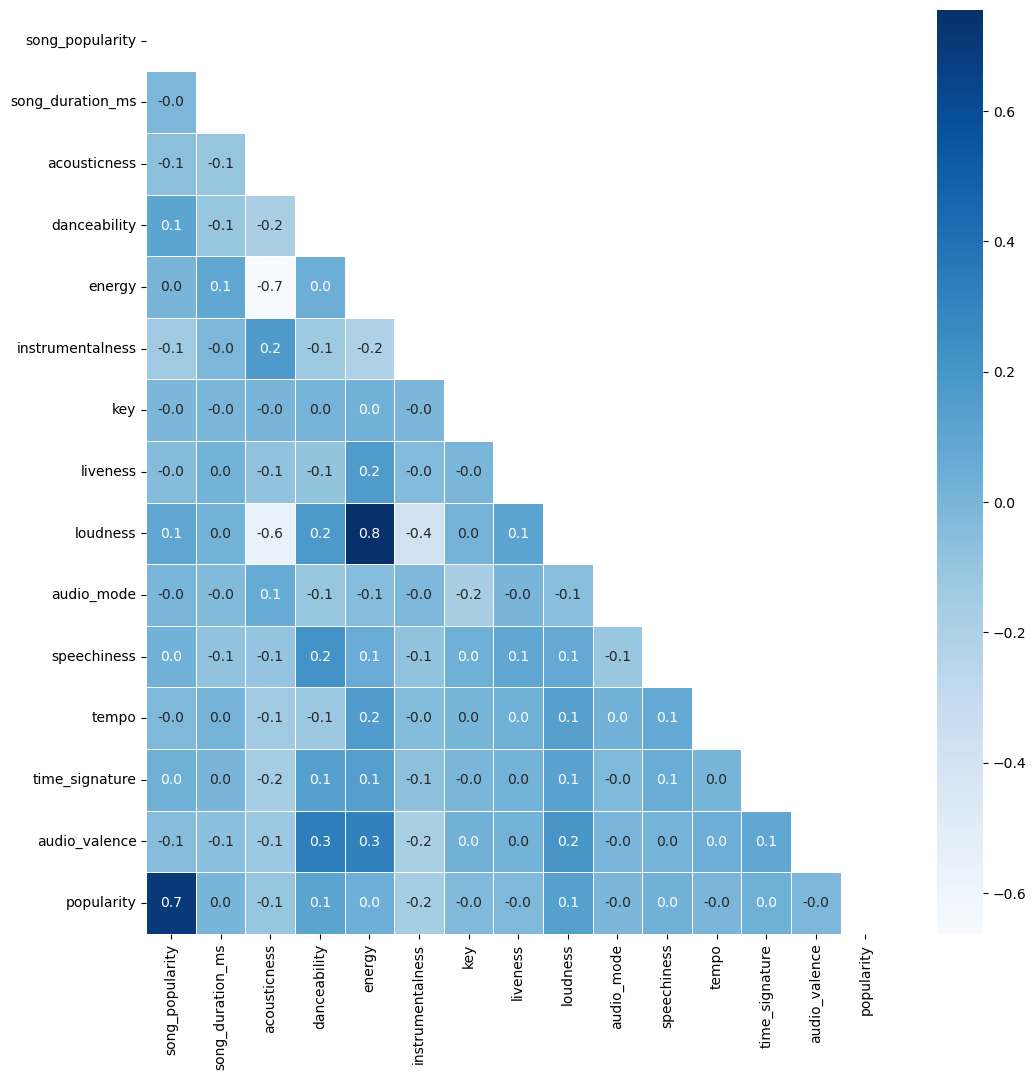

In [12]:
f,ax=plt.subplots(figsize=(12, 12))
mask=np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data.corr(),annot=True,linewidths=0.4,linecolor="white",fmt='.1f',ax=ax,cmap="Blues",mask=mask)
plt.show()

# basic data analysis

In [13]:
# key vs popularity
data[["key","popularity"]].groupby(["key"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,key,popularity
1,1.0,0.356285
6,6.0,0.321984
0,0.0,0.303850
5,5.0,0.300508
11,11.0,0.293750
8,8.0,0.292068
4,4.0,0.284853
10,10.0,0.280992
2,2.0,0.265889
9,9.0,0.253828


In [14]:
# audio_mode vs popularity
data[["audio_mode","popularity"]].groupby(["audio_mode"], as_index = False).mean().sort_values(by="popularity",ascending=False)

,audio_mode,popularity
0,0.0,0.296545
1,1.0,0.285014


In [15]:
# time_signature vs popularity
data[["time_signature","popularity"]].groupby(["time_signature"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,time_signature,popularity
4,5.0,0.304721
3,4.0,0.292497
2,3.0,0.222798
1,1.0,0.178082
0,0.0,0.000000


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


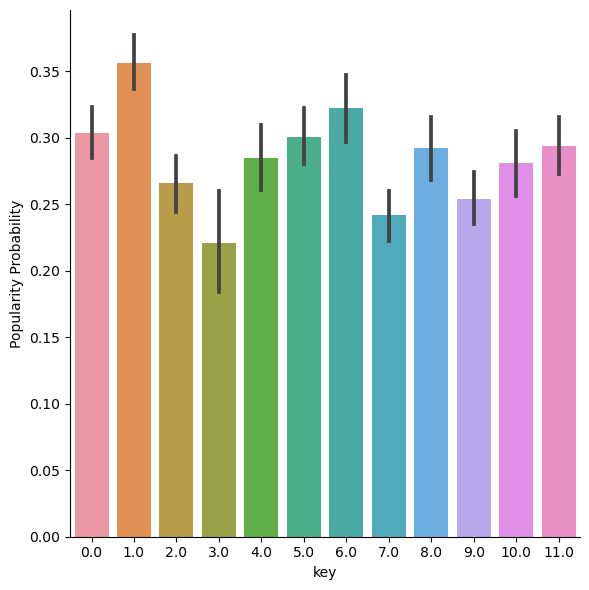

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is your DataFrame and "key" and "popularity" are columns in it

g = sns.catplot(x="key",y="popularity",data=data,kind="bar",height=6)
g.set_ylabels("Popularity Probability")
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


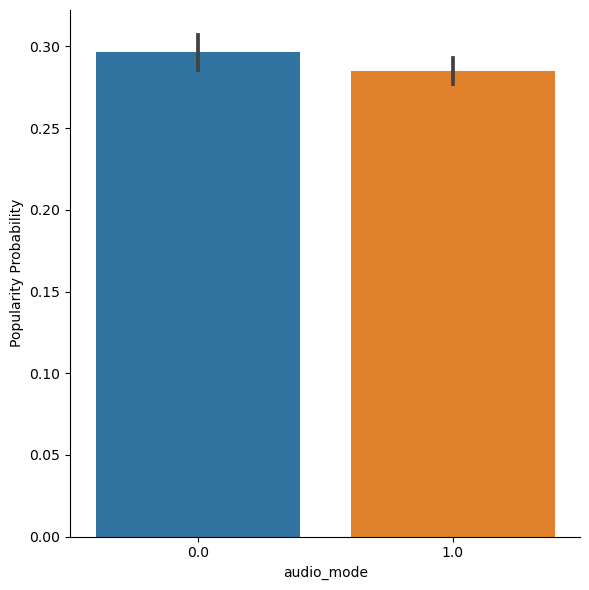

In [69]:
g = sns.catplot(x="audio_mode",y="popularity",data=data,kind="bar",height=6)
g.set_ylabels("Popularity Probability")
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


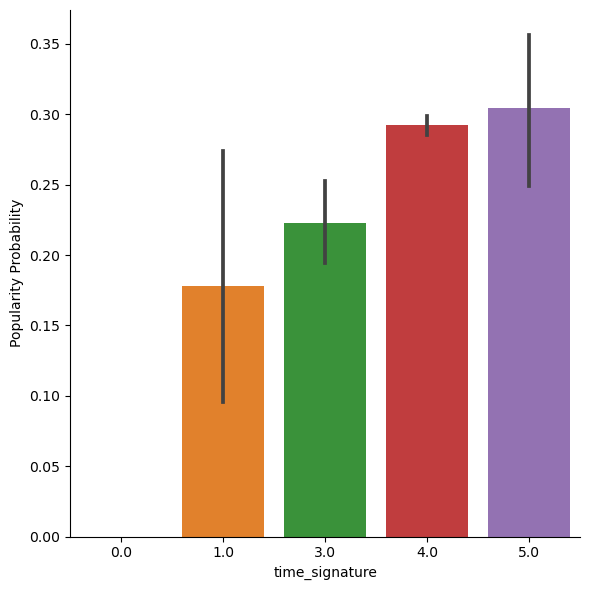

In [71]:
g = sns.catplot(x = "time_signature", y = "popularity", data =data, kind = "bar", height = 6)
g.set_ylabels("Popularity Probability")
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


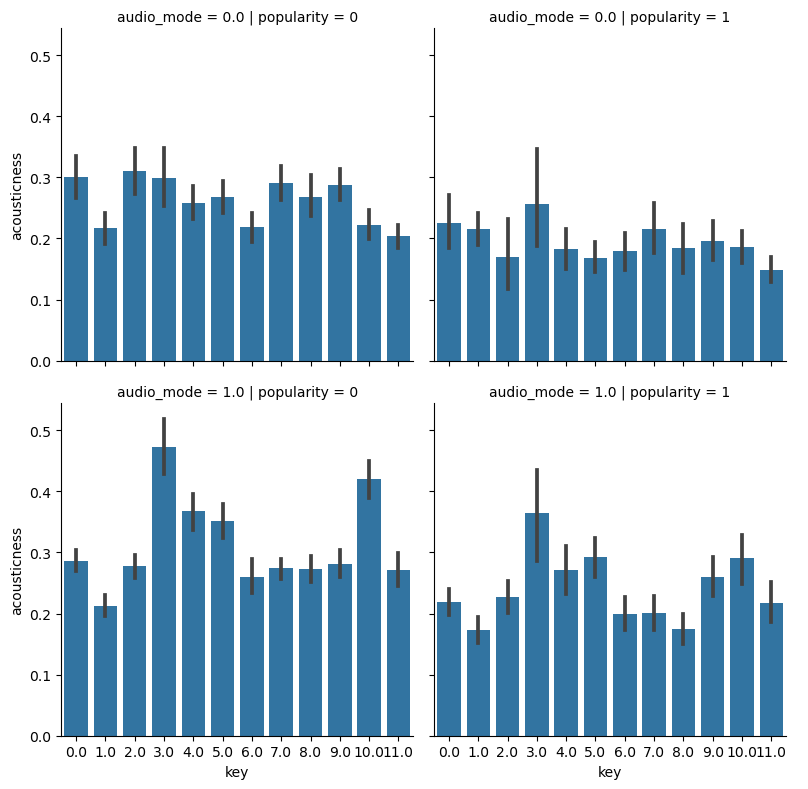

In [74]:
g = sns.FacetGrid(data, row = "audio_mode", col = "popularity", height = 4)
g.map(sns.barplot, "key", "acousticness")
g.add_legend()
plt.show()

In [17]:
#Data distribution of songs display today's songs features like dancebility, energy, loudness and tempo are quite high. People like fast and loud music.
#According to instrumentalness, liveness and speechness, most of the songs are not live performances and they have lyrics.
#Keys like 0,1,5,6 and 11 seems more effective in songs. And if key== 0 or 1 or 6 song has more chance to be populer.
#Time_signure is mostly 4 and 5 in both populer and general data.
#If danceability>0.6 song has more chance to be popular.
#If loudness > -10 song has more chance to be popular

In [18]:
#As we see in the feature explanations, audio valance describes the musical positiveness conveyed by a track (like sad or happiness - between 0 to 1). We supposed our threshold is 0.5.
#With this threshold we have happy songs more in the general data and the numbers are pretty close in the popular songs, but when we looked at top 500, we can say that negative songs are twice as much as positives.


data3=data.copy()
data3["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in data.audio_valence ]
data3["song_audio_valence"].value_counts()

song_audio_valence
Happy    10117
Sad       8718
Name: count, dtype: int64

In [19]:
data=data.drop('song_popularity',axis=1)

In [20]:
x=data.drop('popularity',axis=1)
y=data['popularity']

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [22]:
model_params={#'svm':{'model':SVC(),'params':{'kernel':['linear','sigmoid','poly','rbf'],'C':[5,10,20],'gamma':['auto','scale',0.1]}},
             'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,5,10]}},
             'KNN':{'model':KNeighborsClassifier(),'params':{'n_neighbors':[5,7,9]}},
            'decision_tree':{'model': DecisionTreeClassifier(),'params':{'max_depth':[3,5,9,15]}},
             'gradient_boost':{'model':GradientBoostingClassifier(),'params':{'n_estimators':[16,18,20],'learning_rate':[0.6,0.3,0.5]}},
              'adaboost':{'model':AdaBoostClassifier(),'params':{'n_estimators':[30,26,15],'learning_rate':[0.3,0.5]}}}

In [23]:
scores=[]
models=['random_forest','KNN','decision_tree','gradient_boost','adaboost']
for model_name in models:             
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name,'best_score':gds.best_score_,'best_params':gds.best_params_}) 

In [24]:
scores

[{'model': 'random_forest',
  'best_score': 0.8626493230687549,
  'best_params': {'n_estimators': 10}},
 {'model': 'KNN',
  'best_score': 0.7291744093443058,
  'best_params': {'n_neighbors': 5}},
 {'model': 'decision_tree',
  'best_score': 0.7680382267056013,
  'best_params': {'max_depth': 15}},
 {'model': 'gradient_boost',
  'best_score': 0.7289620387576321,
  'best_params': {'learning_rate': 0.6, 'n_estimators': 18}},
 {'model': 'adaboost',
  'best_score': 0.7118131138837271,
  'best_params': {'learning_rate': 0.5, 'n_estimators': 30}}]

In [25]:
svc_model=SVC()

In [ ]:
#gscv=GridSearchCV(svc_model,{'gamma':['auto','scale',0.1],'C':[1,5,10,20],'kernel':['linear','poly','sigmoid','rbf']},cv=5,return_train_score=True)


In [26]:
svc_model.fit(x,y)

SVC()

In [27]:
svc_model.score(x,y)

0.7246615343774887

In [28]:
Logistic_model=LogisticRegression()

In [29]:
Log=GridSearchCV(Logistic_model,{'C':[6,12,9]},cv=5,return_train_score=True)

In [30]:
Log.fit(x,y)

GridSearchCV(cv=5, estimator=LogisticRegression(), param_grid={'C': [6, 12, 9]},
             return_train_score=True)

In [31]:
Log.best_params_

{'C': 6}

In [32]:
Log.best_score_

0.7089992036103

In [33]:
Guassian=GaussianNB()
XGB=XGBClassifier()

In [34]:
fold=StratifiedKFold(n_splits=5,shuffle=True)

In [35]:
gaussian_score=cross_val_score(Guassian,x,y,cv=fold)
xgb_score=cross_val_score(XGB,x,y,cv=fold)

In [36]:
print(gaussian_score.mean())
print(xgb_score.mean())

0.526041943190868
0.836368462967879


In [37]:
#best model is random forest
#{'model': 'random_forest',
  #'best_score': 0.8605256172020175,
  #'best_params': {'n_estimators': 10}}

In [38]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=45)

In [39]:
for train,test in kf.split(x,y):
    x_train,x_test=x[train],x[test]
    y_train,y_test=y[train],y[test]

In [40]:
best_model=RandomForestClassifier(n_estimators=10,random_state=20)

In [41]:
best_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=20)

In [42]:
best_model.score(x_test,y_test)

0.8654101406955137

In [43]:
y_pred=best_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2558,  120],
       [ 387,  702]], dtype=int64)

Text(50.722222222222214, 0.5, 'predicted y value')

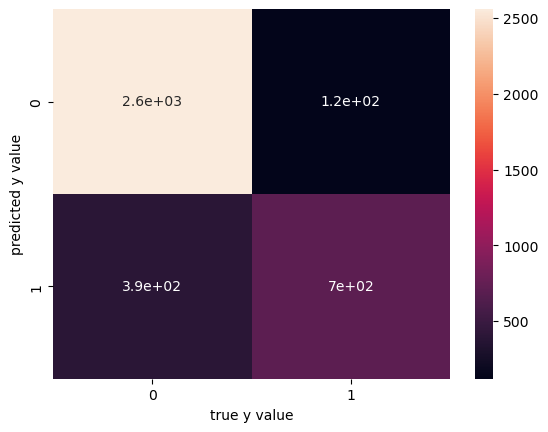

In [45]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('true y value')
plt.ylabel('predicted y value')

In [46]:
accuracy_score(y_test,y_pred)

0.8654101406955137

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2678
           1       0.85      0.64      0.73      1089

    accuracy                           0.87      3767
   macro avg       0.86      0.80      0.82      3767
weighted avg       0.86      0.87      0.86      3767



In [48]:
data.keys()

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'popularity'],
      dtype='object')

In [49]:
song_duration_ms=input('enter the song_duration_ms:')
acousticness=input("enter the acousticness:")
danceability=input("enter the danceability:")
energy=input("enter the energy:")
instrumentalness=input("enter the instrumentalness:")
key=input("enter the key:")
liveness=input("enter the liveness:")
loudness=input("enter the loudness")
audio_mode=input("enter the audio_mode")
speechiness=input("enter the speechiness")
tempo=input("enter the tempo")
time_signature=input("enter the time_signature")
audio_valence=input("enter the audio_valence")

prediction=best_model.predict([[song_duration_ms, acousticness, danceability, energy,
       instrumentalness, key, liveness, loudness, audio_mode,
       speechiness, tempo, time_signature, audio_valence]])
prediction

enter the song_duration_ms:231789
enter the acousticness:0.0056
enter the danceability:0.567
enter the energy:0.786
enter the instrumentalness:0.0006
enter the key:9
enter the liveness:0.125
enter the loudness-7.89
enter the audio_mode0
enter the speechiness0.0456
enter the tempo145.07
enter the time_signature4
enter the audio_valence0.456


array([0], dtype=int64)

In [51]:
if prediction==[[1]]:
    print("the song is popular")
else:
    print("the song is unpopular")

the song is unpopular
